### Avocado Price EDA Group Project

<img src= 210511125639-avocado-stock.jpg style="width:400px;height:400px">

Exploratory Data Analysis of avocado prices and sales volume 2015-2023
In the Unites States of America


In [426]:
# importing the required packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [427]:
# Loading data frame and assigning it to Avocado_price_df

""" 
The Url will have to be changed once the dataset it has been
loaded on the group project repository
"""

avocado_price_df = pd.read_csv("https://raw.githubusercontent.com/Christiaandebeer1986/Python-Project/main/Avocado_HassAvocadoBoard_20152023v1.0.1.csv")

In [428]:
# Testing if data frame has been loaded successfully 
avocado_price_df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


In [429]:
# Exploring column within data frame
avocado_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB


In [430]:
# Exploring shape of dataset
avocado_price_df.shape

(53415, 12)

In [431]:
# Summary of statistics transposed for easier viewing
avocado_price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,53415.0,1.428910,3.931160e-01,0.44,1.119091,1.40,1.690,3.440830e+00
TotalVolume,53415.0,869447.441374,3.545274e+06,84.56,16264.655000,120352.46,454238.015,6.103446e+07
plu4046,53415.0,298270.749448,1.307669e+06,0.00,694.725000,14580.58,128792.380,2.544720e+07
plu4225,53415.0,222217.037654,9.554624e+05,0.00,2120.800000,17516.63,93515.600,2.047057e+07
plu4770,53415.0,20531.954686,1.040977e+05,0.00,0.000000,90.05,3599.735,2.860025e+06
TotalBags,53415.0,217508.289491,8.676947e+05,0.00,7846.520000,36953.10,111014.610,1.629830e+07
SmallBags,41025.0,103922.170677,5.692608e+05,0.00,0.000000,694.58,37952.980,1.256716e+07
LargeBags,41025.0,23313.164066,1.496622e+05,0.00,0.000000,0.00,2814.920,4.324231e+06
XLargeBags,41025.0,2731.811796,2.258910e+04,0.00,0.000000,0.00,0.000,6.795868e+05


In [432]:
# checking for null values
avocado_price_df.isnull().sum()

Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type                0
region              0
dtype: int64

# Data Cleaning

In [433]:
# Standardizing column names to snake case
avocado_price_df = avocado_price_df.rename(columns={
    'Date': 'date',
    'AveragePrice': 'average_price',
    'TotalVolume': 'total_volume',
    'TotalBags': 'total_bags',
    'SmallBags': 'small_bags',
    'LargeBags': 'large_bags',
    'XLargeBags': 'x_large_bags'
    })
# See if changes worked
avocado_price_df

,date,average_price,total_volume,plu4046,plu4225,plu4770,total_bags,small_bags,large_bags,x_large_bags,type,region
0,2015-01-04,1.220000,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.790000,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.000000,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.760000,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.080000,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington
...,...,...,...,...,...,...,...,...,...,...,...,...
53410,2023-12-03,1.550513,5693.91,204.64,1211.25,0.00,4278.03,NaN,NaN,NaN,organic,Toledo
53411,2023-12-03,1.703920,343326.10,66808.44,132075.11,58.65,138830.45,NaN,NaN,NaN,organic,West
53412,2023-12-03,1.618931,34834.86,15182.42,1211.38,0.00,18075.66,NaN,NaN,NaN,organic,WestTexNewMexico
53413,2023-12-03,1.245406,2942.83,1058.54,7.46,0.00,1779.19,NaN,NaN,NaN,organic,Wichita


In [434]:
# checking for duplicate rows
print(avocado_price_df.duplicated().any())

False


In [435]:
# Change the date colum from object to date time and checking the change
avocado_price_df['date'] = pd.to_datetime(avocado_price_df['date'])
avocado_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           53415 non-null  datetime64[ns]
 1   average_price  53415 non-null  float64       
 2   total_volume   53415 non-null  float64       
 3   plu4046        53415 non-null  float64       
 4   plu4225        53415 non-null  float64       
 5   plu4770        53415 non-null  float64       
 6   total_bags     53415 non-null  float64       
 7   small_bags     41025 non-null  float64       
 8   large_bags     41025 non-null  float64       
 9   x_large_bags   41025 non-null  float64       
 10  type           53415 non-null  object        
 11  region         53415 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 4.9+ MB


# EDA

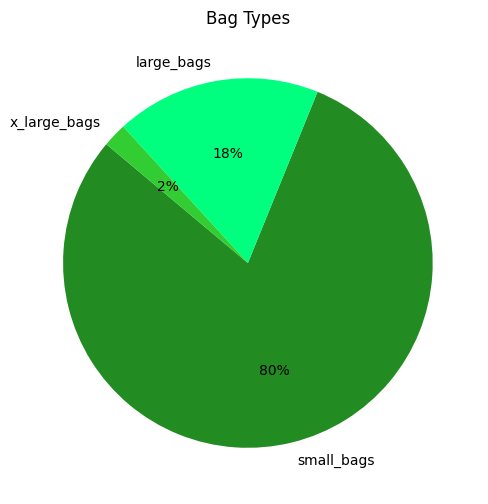

In [436]:
# Sum of each bag
total_small_bags = avocado_price_df['small_bags'].sum()
total_large_bags = avocado_price_df['large_bags'].sum()
total_xlarge_bags = avocado_price_df['x_large_bags'].sum()

# Data for the pie plot
sizes = [total_small_bags, total_large_bags, total_xlarge_bags]
labels = ['small_bags', 'large_bags', 'x_large_bags']
colors = ['forestgreen', 'springgreen', 'limegreen']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=140)
plt.title('Bag Types')
plt.show()

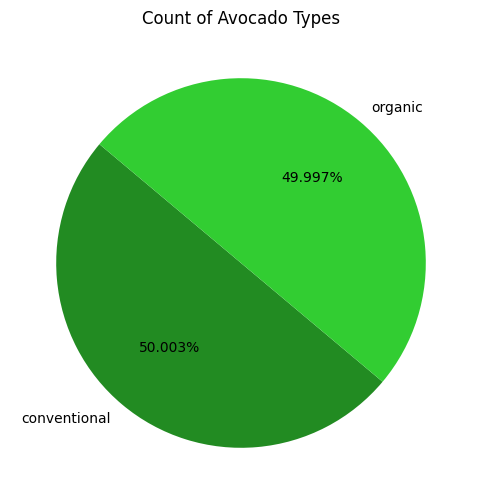

In [437]:
# Count all the conventional and organic types in the type column
type_count = avocado_price_df['type'].value_counts()

# Data for Pie chart
sizes = type_count.values
labels = type_count.index
colors = ['forestgreen', 'limegreen']

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.3f%%', startangle=140)
plt.title('Count of Avocado Types')
plt.show()

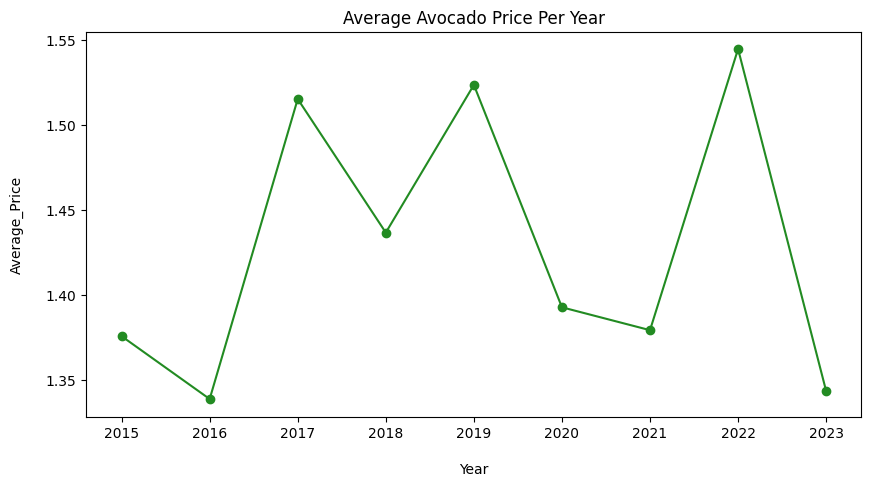

In [438]:
# grouping average_price per year 
average_price_per_year = avocado_price_df.groupby(avocado_price_df['date'].dt.year)['average_price'].mean()

#create a line graph
plt.figure(figsize=(10, 5))
plt.plot(average_price_per_year.index, average_price_per_year.values, marker='o', color = 'forestgreen')
plt.title('Average Avocado Price Per Year')
plt.xlabel('\nYear')
plt.ylabel('Average_Price\n')
plt.show()

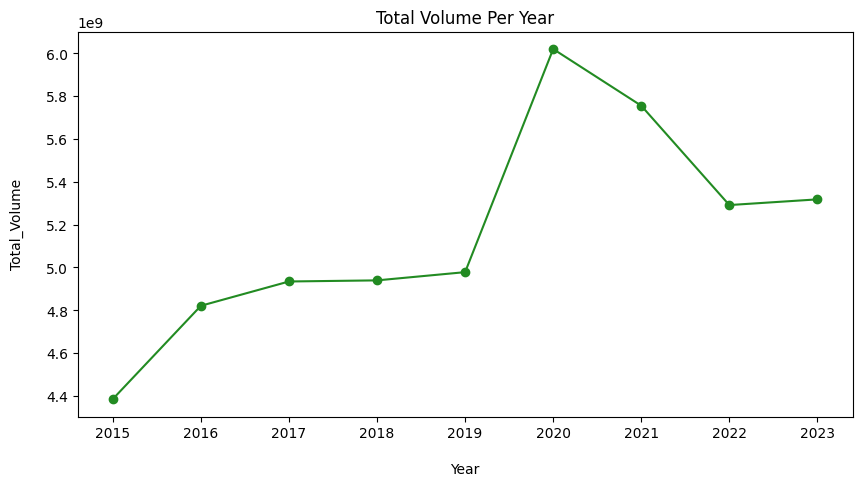

In [439]:
# grouping total volume per year
total_volume_per_year = avocado_price_df.groupby(avocado_price_df['date'].dt.year)['total_volume'].sum()

#create a line graph
plt.figure(figsize=(10, 5))
plt.plot(total_volume_per_year.index, total_volume_per_year.values, marker='o', color = 'forestgreen')
plt.title('Total Volume Per Year')
plt.xlabel('\nYear')
plt.ylabel('Total_Volume\n')
plt.show()


<Axes: >

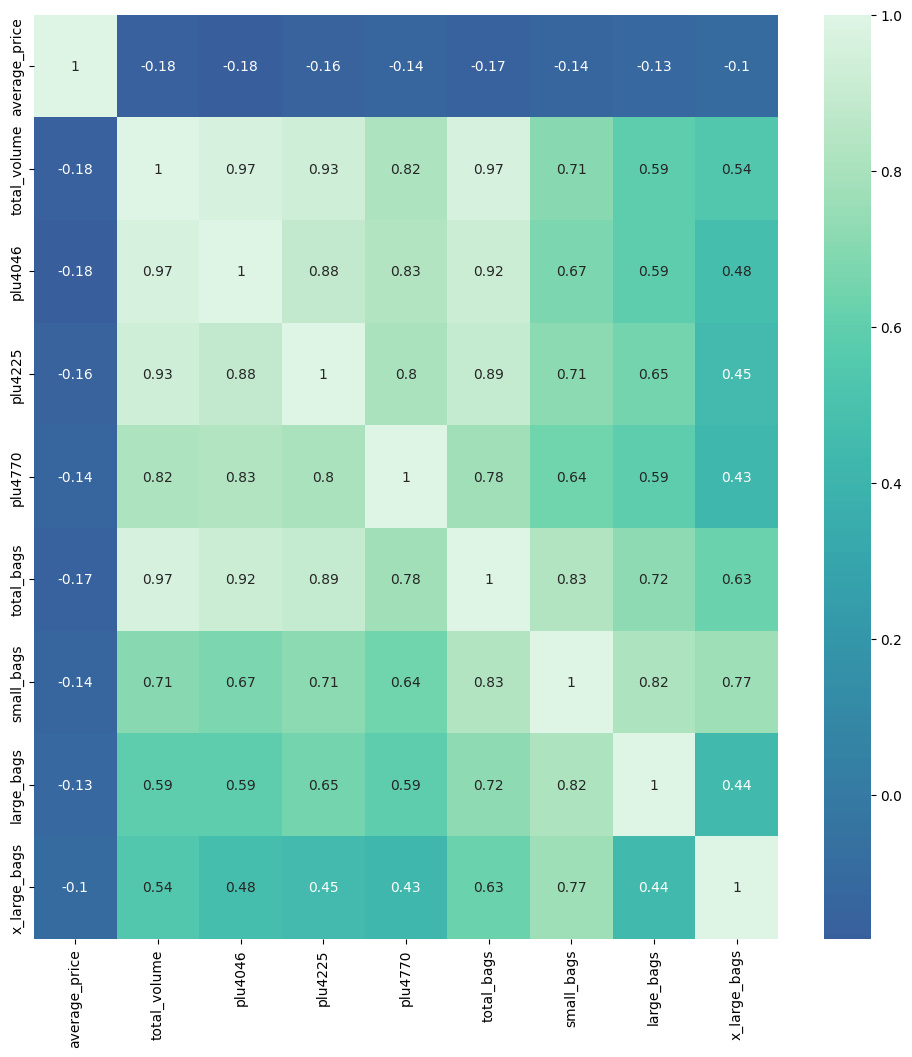

In [440]:
# Select only columns with numerical values
correlation_avocado_df = avocado_price_df[['average_price', 'total_volume', 'plu4046', 'plu4225',
       'plu4770', 'total_bags', 'small_bags', 'large_bags', 'x_large_bags']]

# Apply the correlation function and saving to variable for easy reference to data
corr=correlation_avocado_df.corr()

# Create a heatmap
plt.figure(figsize=(12,12))
sns.heatmap(data = corr, annot=True,cmap='mako',center=0)


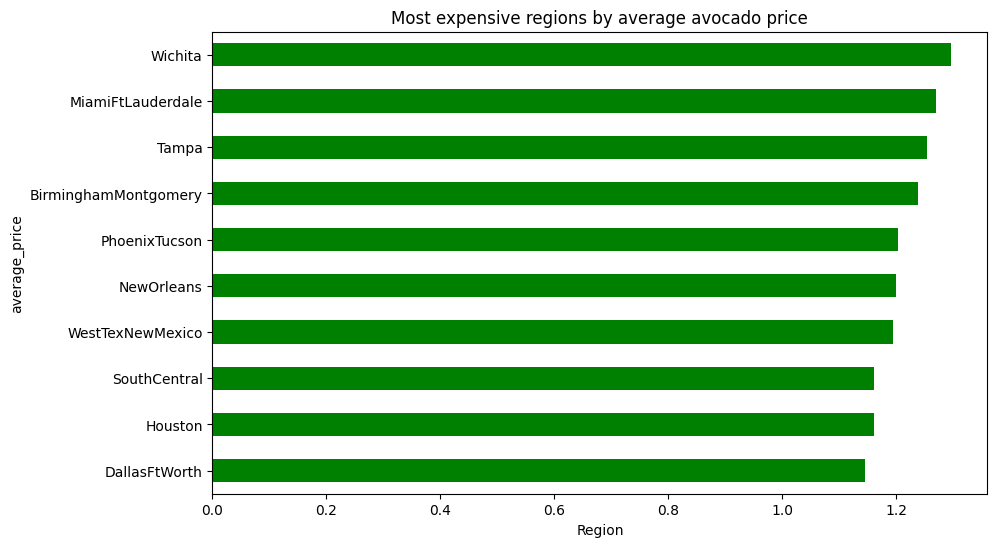

In [441]:
# Group average price per region
average_price_per_region = avocado_price_df.groupby('region')['average_price'].mean()

# Sort the top 10 expensive regions 
top_10_regions = average_price_per_region.sort_values().head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
top_10_regions.plot(kind='barh', color='Green')
plt.title('Most expensive regions by average avocado price')
plt.xlabel('Region')
plt.ylabel('average_price')
plt.show()